In [ ]:
Top 10 Currencies detection in dec 2022

In [ ]:
import pandas as pd
import numpy as np 
import missingno as mno
import pickle 
import json
import time 
import gc
import random
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

import networkx as nx
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from plotly.offline import init_notebook_mode, iplot
from IPython.core.display import display, HTML 
init_notebook_mode(connected=True)
import datetime
gc.collect()

In [ ]:
leaderboard=pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/Current Crypto leaderboard.csv')
leaderboard

In [ ]:
leaderboard.head(10)

In [ ]:
btc_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/bitcoin.csv')   #1
eth_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/ethereum.csv')   #2
usdt_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/tether.csv')    #3
usdc_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/usd coin.csv')   #4
ada_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/cardano.csv')     #5
xrp_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/xrp.csv')         #6
bnb_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/BNB.csv')         #7
busd_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/Binance USD.csv') #8
sol_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/solana.csv')       #9
dot_data = pd.read_csv('../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/polkadot.csv')     #10

coin_names = list(leaderboard['Name'])

coin_labels_data = [btc_data, eth_data, bnb_data, usdt_data, sol_data, ada_data, usdc_data, xrp_data, busd_data, dot_data]

for i in range(len(coin_labels_data)):
    coin_labels_data[i]['Coin_name'] = coin_names[i]
    print(f"{coin_names[i]} data shape:", coin_labels_data[i].shape)
    print(f"{coin_names[i]} data range: {coin_labels_data[i]['Date'].min()} to {coin_labels_data[i]['Date'].max()}")
    print("\n")

<div class='alert alert-info' style="font-family:Verdana;
           letter-spacing:0.8px;font-size:90%;">
    <h3><center><b> Crypto currency generations</b></center></h3>
    <b>First Generation Cryptocurrencies</b> - The first generation cryptocurrencies was spawned by Bitcoin. Several Bitcoin forks exist on this generation. Most 1st generation coins simply copied the Bitcoin source code while modifying the encryption algorithms and total coin supply.
<br>
    <b>Second Generation Cryptocurrencies</b> - The second generation of cryptocurrencies added on-chain smart contracts and fully featured contract programming languages. Ethereum, which is the most notable 2nd generation cryptocurrency, brought smart contracts and introduced tokens to the masses, spawning the wave of ICO's from 2014 onwards.
<br>
<b>Third Generation Cryptocurrencies</b> - Third Generation Cryptocurrencies are still being developed. These include everything from second gen cryptos, plus on-chain governance, delegated Proof of Stake consensus and native compliance features. Cardano is a notable example of 3rd gen cryptocurrency project.
    </div>

In [ ]:
btc_data['coin_type'] = 'BTC'

alt_coins = [eth_data, sol_data, dot_data, usdt_data, usdc_data, xrp_data, ada_data, bnb_data]
for data in alt_coins:
    data['coin_type'] = 'Alt_coins'

first_gen = [btc_data]
for data in first_gen:
    data['Gen'] = 'First generation'

second_gen = [eth_data, bnb_data]
for data in second_gen:
    data['Gen'] = 'Second generation'

third_gen = [sol_data, ada_data, dot_data]
for data in third_gen:
    data['Gen'] = 'Third generation'

final_df = pd.concat(coin_labels_data, ignore_index=True)

final_df['Date'] = pd.to_datetime(final_df['Date'], format='%Y-%m-%d')

final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month

print(final_df.head())

In [ ]:
import plotly.express as px

oct_df = final_df[(final_df['Year'] == 2021) & (final_df['Month'] == 11)]

df = oct_df.groupby('Coin_name')[['Close', 'Open', 'High', 'Low']].mean().reset_index()

df_melted = df.melt(id_vars=['Coin_name'], var_name='OHLC', value_name='Price')

fig = px.line(df_melted, x='Coin_name', y='Price', color='OHLC', 
              title="Mean OHLC Prices of Top 10 Cryptocurrencies in Nov-21")

fig.update_layout(template='plotly_dark',
                  yaxis_title='Price ($)',
                  title_x=0.5,
                  hovermode="x")

fig.update_yaxes(tickprefix="$", showgrid=True)

fig.show()


In [ ]:
def candle_stick(df,name,month,year,rank):
    
    datetime_object = datetime.datetime.strptime(str(month), "%m")
    full_month_name = datetime_object.strftime("%B")
    
    datetime_object_prev = datetime.datetime.strptime(str(month-1), "%m")
    full_month_name_prev = datetime_object_prev.strftime("%B")
    
    data=df[(df['Coin_name']==name)&(df['Year']==year)&(df['Month']==month)]
    data_sept=df[(df['Coin_name']==name)&(df['Year']==year)&(df['Month']==month-1)]
    fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close']))

    fig.update_layout(template='plotly_dark',
        title='Rank {} : {} Price in {} - 21'.format(rank,name,full_month_name),
        xaxis_title="Date",
        yaxis_title='{} Price'.format(name),title_x=0.5,
        )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="$", showgrid=False
    )

    fig.update_xaxes(
         showgrid=True
    )
    
    low=[data['Open'].min(),data['High'].min(),data['Low'].min(),data['Close'].min()]
    high=[data['Open'].max(),data['High'].max(),data['Low'].max(),data['Close'].max()]
    
    low2=[data_sept['Open'].min(),data_sept['High'].min(),data_sept['Low'].min(),data_sept['Close'].min()]
    high2=[data_sept['Open'].max(),data_sept['High'].max(),data_sept['Low'].max(),data_sept['Close'].max()]
    
    

    fig.show()
    
    display(HTML('<div style="color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:100%;font-family:Verdana;letter-spacing:0.5px;text-align:center"><p style="padding: 10px;color:white;"><center><b> {} {} Summary :<center></b></p><br>Median price: {}<br>Mean price: {}<br>Highest price: {}<br>Lowest price of the month: {}<br><b>Growth rate: {}%</b></div>'.format(name,full_month_name,data['Close'].median(),data['Close'].mean(),max(high),min(low),round(((data['Close'].median()-data_sept['Close'].median())/data_sept['Close'].median())*100,2))))
    display(HTML('<div style="color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:100%;font-family:Verdana;letter-spacing:0.5px;text-align:center"><p style="padding: 10px;color:white;"><center><b> {} {} Summary :<center></b></p><br>Median price: {}<br>Mean price: {}<br>Highest price: {}<br>Lowest price: {}<br></div>'.format(name,full_month_name_prev,data_sept['Close'].median(),data_sept['Close'].mean(),max(high2),min(low2))))



In [ ]:
mth=12
candle_stick(final_df,'Bitcoin',mth,2021,1)

In [ ]:
def inference_writer(final_df,name,month):
    
    ef_high=final_df[(final_df['Coin_name']==name)&(final_df['Year']==2021)&(final_df['Month']==month)]
    print(ef_high[ef_high['Close']==ef_high['Close'].max()][['Date','Close']])
    
    ef=final_df[(final_df['Coin_name']==name)&(final_df['Year']==2021)&(final_df['Month']==month)]
    print(ef[ef['Close']==ef['Close'].min()][['Date','Close']])
    
    
inference_writer(final_df,'Bitcoin',12)

In [ ]:
candle_stick(final_df,'Ethereum',mth,2021,2)

In [ ]:
candle_stick(final_df,'Binance Coin',mth,2021,3)

In [ ]:
candle_stick(final_df,'Tether',mth,2021,4)

In [ ]:
candle_stick(final_df,'Solana',mth,2021,5)

In [ ]:
candle_stick(final_df,'Cardano',mth,2021,6)

In [ ]:
candle_stick(final_df,'USD Coin',mth,2021,7)

In [ ]:
candle_stick(final_df,'XRP',mth,2021,8)

In [ ]:
candle_stick(final_df,'Terra',mth,2021,9)

In [ ]:
candle_stick(final_df,'Polkadot',mth,2021,10)

In [ ]:
year_df=final_df[(final_df['Year']==2021)]
group_yr_df=year_df.groupby(['Coin_name','Month']).agg({'Close':np.median}).reset_index()

def mom(m1,m2):
    return round(((m2-m1)/m1)*100,2)

mom_list=[]
for i in list(group_yr_df['Coin_name'].unique()):
    df=group_yr_df[group_yr_df['Coin_name']==i]
    for j in range(0,len(df)):
        if df['Month'].iloc[j]!=1:
            mom_list.append(mom(df['Close'].iloc[j-1],df['Close'].iloc[j]))
        else:
            mom_list.append(0)
    
group_yr_df['mom']=mom_list

group_yr_df['mom']=round(group_yr_df['mom'],2)
df2=group_yr_df.pivot_table(index='Coin_name',columns='Month',values='mom')

def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0) else None)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=1)

s2.set_caption("Median Price Month on Month (MOM) Growth rate")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:2.50em;'
 }], overwrite=False)



In [ ]:
year_df=final_df[(final_df['Year']==2021)]
group_yr_df=year_df.groupby(['Coin_name','Month']).agg({'Close':np.mean}).reset_index()

def mom(m1,m2):
    return round(((m2-m1)/m1)*100,2)

mom_list=[]
for i in list(group_yr_df['Coin_name'].unique()):
    df=group_yr_df[group_yr_df['Coin_name']==i]
    for j in range(0,len(df)):
        if df['Month'].iloc[j]!=1:
            mom_list.append(mom(df['Close'].iloc[j-1],df['Close'].iloc[j]))
        else:
            mom_list.append(0)
    
group_yr_df['mom']=mom_list

group_yr_df['mom']=round(group_yr_df['mom'],2)
df2=group_yr_df.pivot_table(index='Coin_name',columns='Month',values='mom')

def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0) else None)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=1)

s2.set_caption("Mean Price Month on Month (MOM) Growth rate")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:2.50em;'
 }], overwrite=False)



In [ ]:
fig=px.line(group_yr_df,x='Month',y='mom',color='Coin_name')
fig.update_layout(template='plotly_dark',
        title='Mean Price Month on Month (MOM) Growth rate -2021',
        xaxis_title="Month in 2021",
        yaxis_title='MoM growth percentage',title_x=0.5,
        )
fig.update_yaxes( # the y-axis is in dollars
    tickprefix="%", showgrid=False
)
fig.update_xaxes(
     showgrid=True
)

In [ ]:
def trading_vol(final_df,month,lst,title_name):
    data=final_df[(final_df['Year']==2021)&(final_df['Month'].isin([month-1,month]))&(final_df['Coin_name'].isin(lst))]
    df2=pd.DataFrame(data.groupby(['Month','Coin_name']).agg({'Volume':np.median}).reset_index())
    df2=df2[df2['Month']==month-1].merge(df2[df2['Month']==month][['Coin_name','Volume']],on='Coin_name',how='left')
    
    datetime_object = datetime.datetime.strptime(str(month), "%m")
    full_month_name = datetime_object.strftime("%B")
    
    datetime_object_prev = datetime.datetime.strptime(str(month-1), "%m")
    full_month_name_prev = datetime_object_prev.strftime("%B")
    
    df2.rename(columns={'Volume_x':full_month_name_prev,'Volume_y':full_month_name},inplace=True)
    df2
    fig = px.line(df2, x='Coin_name', y=[full_month_name_prev,full_month_name])
    fig.update_layout(template='plotly_dark',
        xaxis_title='Coin',
        yaxis_title='Median trading volume',
        title=title_name,
        hovermode="x",title_x=0.5
    )
    fig.update_yaxes( # the y-axis is in dollars
        tickprefix="$", showgrid=True
    )

    fig.update_xaxes(
         showgrid=True
    )
    fig.show()

In [ ]:
trading_vol(final_df,mth,list(final_df['Coin_name'].unique()),'Median trading volume of top 10 crypto currencies of Dec-2021')

In [ ]:
eda=list(final_df['Coin_name'].unique())
eda.remove('Solana')
trading_vol(final_df,12,eda,'Median trading volume of coins except Solana')

In [ ]:
trading_vol(final_df,mth,['Binance Coin','Bitcoin','Ethereum'],'Median trading volume of Top 3 coins')

In [ ]:
trading_vol(final_df,mth,['Cardano','Polkadot','Terra'],'Median trading volume of 3rd generation coins')

In [ ]:
trading_vol(final_df,mth,['Cardano','Tether','USD Coin','XRP'],'Median trading volume of Cardano, Tether, USD Coin & Ripple')

In [2]:
import pandas as pd

# Load the dataset
file_path = "../input/top-10-cryptocurrencies-historical-dataset/Top 100 Crypto Coins/Current Crypto leaderboard.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability
0,1,Bitcoin,BTC,21311.3000,$407.42B,$32.06B,45.55%,-0.75%,-11.84%,True
1,2,Ethereum,ETH,1623.2200,$197.86B,$18.54B,26.34%,+0.92%,-14.82%,True
2,3,Tether,USDT,0.9999,$67.54B,$52.33B,74.35%,0%,-0.02%,True
3,4,USD Coin,USDC,1.0001,$52.26B,$5.45B,7.74%,0%,-0.01%,True
4,5,BNB,BNB,297.3000,$47.87B,$1.46B,2.07%,-0.97%,-7.18%,True


In [3]:
import numpy as np

# Function to clean financial values
def clean_numeric(value):
    if isinstance(value, str):
        value = value.replace("$", "").replace("%", "").replace("B", "e9").replace("M", "e6")  # Convert B to billion, M to million
        try:
            return float(eval(value))  # Convert to float
        except:
            return np.nan  # Handle errors
    return value

# Clean numerical columns
df["Price (USD)"] = df["Price (USD)"].apply(clean_numeric)
df["Market Cap"] = df["Market Cap"].apply(clean_numeric)
df["Vol (24H)"] = df["Vol (24H)"].apply(clean_numeric)
df["Total Vol"] = df["Total Vol"].apply(clean_numeric)
df["Chg (24H)"] = df["Chg (24H)"].apply(clean_numeric)
df["Chg (7D)"] = df["Chg (7D)"].apply(clean_numeric)

# Drop rows with missing values
df = df.dropna()

# Display cleaned dataset
df.head()


,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability
0,1,Bitcoin,BTC,21311.3000,4.074200e+11,3.206000e+10,45.55,-0.75,-11.84,True
1,2,Ethereum,ETH,1623.2200,1.978600e+11,1.854000e+10,26.34,0.92,-14.82,True
2,3,Tether,USDT,0.9999,6.754000e+10,5.233000e+10,74.35,0.00,-0.02,True
3,4,USD Coin,USDC,1.0001,5.226000e+10,5.450000e+09,7.74,0.00,-0.01,True
4,5,BNB,BNB,297.3000,4.787000e+10,1.460000e+09,2.07,-0.97,-7.18,True


In [4]:
from sklearn.ensemble import IsolationForest

# Select relevant numerical features for anomaly detection
features = ["Price (USD)", "Market Cap", "Vol (24H)", "Total Vol", "Chg (24H)", "Chg (7D)"]
X = df[features]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly_IF"] = iso_forest.fit_predict(X)

# Mark anomalies (-1 indicates an anomaly)
df["Anomaly_IF"] = df["Anomaly_IF"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Display anomalies detected by Isolation Forest
df[df["Anomaly_IF"] == "Anomaly"]


,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability,Anomaly_IF
0,1,Bitcoin,BTC,21311.3000,4.074200e+11,3.206000e+10,45.55,-0.75,-11.84,True,Anomaly
1,2,Ethereum,ETH,1623.2200,1.978600e+11,1.854000e+10,26.34,0.92,-14.82,True,Anomaly
2,3,Tether,USDT,0.9999,6.754000e+10,5.233000e+10,74.35,0.00,-0.02,True,Anomaly
3,4,USD Coin,USDC,1.0001,5.226000e+10,5.450000e+09,7.74,0.00,-0.01,True,Anomaly
5,6,Binance USD,BUSD,1.0001,1.903000e+10,4.890000e+09,6.95,0.00,0.06,True,Anomaly
16,17,Wrapped Bitcoin,WBTC,21302.0000,5.270000e+09,2.168500e+08,0.31,-0.69,-11.72,True,Anomaly
29,30,Bitcoin BEP2,BTCB,18678.1800,2.240000e+09,6.940000e+06,0.01,-0.75,-11.79,True,Anomaly
33,34,EOS,EOS,1.8528,1.840000e+09,1.450000e+09,2.06,20.01,45.23,True,Anomaly
41,42,Chiliz,CHZ,0.2246,1.340000e+09,7.062300e+08,1.00,20.55,8.52,True,Anomaly
90,91,Celsius,CEL,1.5768,4.130000e+08,2.747000e+07,0.04,-19.53,-39.27,True,Anomaly


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Normalize the data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["Anomaly_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Mark anomalies (-1 indicates an anomaly)
df["Anomaly_DBSCAN"] = df["Anomaly_DBSCAN"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Display anomalies detected by DBSCAN
df[df["Anomaly_DBSCAN"] == "Anomaly"]


,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability,Anomaly_IF,Anomaly_DBSCAN
0,1,Bitcoin,BTC,21311.3000,4.074200e+11,3.206000e+10,45.55,-0.75,-11.84,True,Anomaly,Anomaly
1,2,Ethereum,ETH,1623.2200,1.978600e+11,1.854000e+10,26.34,0.92,-14.82,True,Anomaly,Anomaly
2,3,Tether,USDT,0.9999,6.754000e+10,5.233000e+10,74.35,0.00,-0.02,True,Anomaly,Anomaly
16,17,Wrapped Bitcoin,WBTC,21302.0000,5.270000e+09,2.168500e+08,0.31,-0.69,-11.72,True,Anomaly,Anomaly
22,23,Cosmos,ATOM,11.8604,3.400000e+09,3.378100e+08,0.48,11.67,4.13,True,Normal,Anomaly
29,30,Bitcoin BEP2,BTCB,18678.1800,2.240000e+09,6.940000e+06,0.01,-0.75,-11.79,True,Anomaly,Anomaly
33,34,EOS,EOS,1.8528,1.840000e+09,1.450000e+09,2.06,20.01,45.23,True,Anomaly,Anomaly
41,42,Chiliz,CHZ,0.2246,1.340000e+09,7.062300e+08,1.00,20.55,8.52,True,Anomaly,Anomaly
90,91,Celsius,CEL,1.5768,4.130000e+08,2.747000e+07,0.04,-19.53,-39.27,True,Anomaly,Anomaly


,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability,Anomaly_IF,Anomaly_DBSCAN
0,1,Bitcoin,BTC,21311.3000,4.074200e+11,3.206000e+10,45.55,-0.75,-11.84,True,Anomaly,Anomaly
1,2,Ethereum,ETH,1623.2200,1.978600e+11,1.854000e+10,26.34,0.92,-14.82,True,Anomaly,Anomaly
2,3,Tether,USDT,0.9999,6.754000e+10,5.233000e+10,74.35,0.00,-0.02,True,Anomaly,Anomaly
3,4,USD Coin,USDC,1.0001,5.226000e+10,5.450000e+09,7.74,0.00,-0.01,True,Anomaly,Normal
4,5,BNB,BNB,297.3000,4.787000e+10,1.460000e+09,2.07,-0.97,-7.18,True,Normal,Normal


             Rank   Price (USD)    Market Cap     Vol (24H)  Total Vol  \
count   99.000000     99.000000  9.900000e+01  9.900000e+01  99.000000   
mean    50.484848    678.507724  1.006435e+10  1.335215e+09   1.896465   
std     29.158736   3525.116364  4.588973e+10  6.388098e+09   9.076159   
min      1.000000      0.000000  3.580000e+08  2.070000e+06   0.000000   
25%     25.500000      0.508400  5.204150e+08  2.147500e+07   0.030000   
50%     50.000000      1.852800  1.040000e+09  8.276000e+07   0.120000   
75%     75.500000     20.275500  3.235000e+09  3.166650e+08   0.450000   
max    100.000000  21311.300000  4.074200e+11  5.233000e+10  74.350000   

       Chg (24H)   Chg (7D)  
count  99.000000  99.000000  
mean    0.157576 -12.846162  
std     4.152061   9.469427  
min   -19.530000 -39.270000  
25%    -0.990000 -18.205000  
50%    -0.270000 -15.160000  
75%     0.555000  -9.520000  
max    20.550000  45.230000  


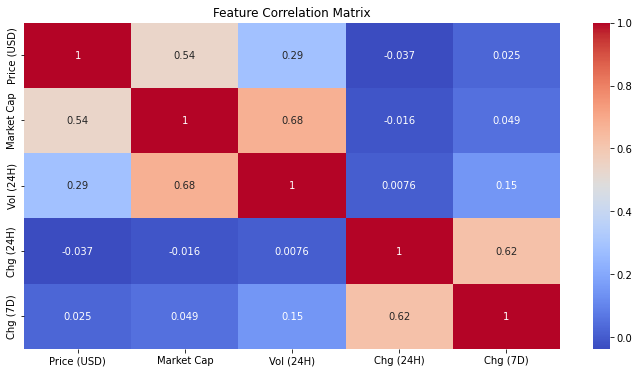

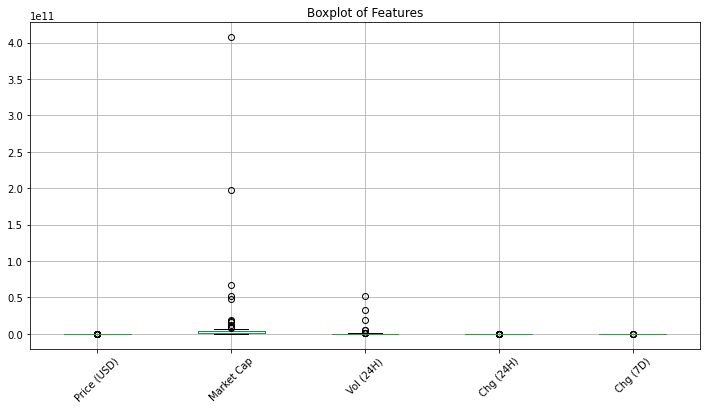

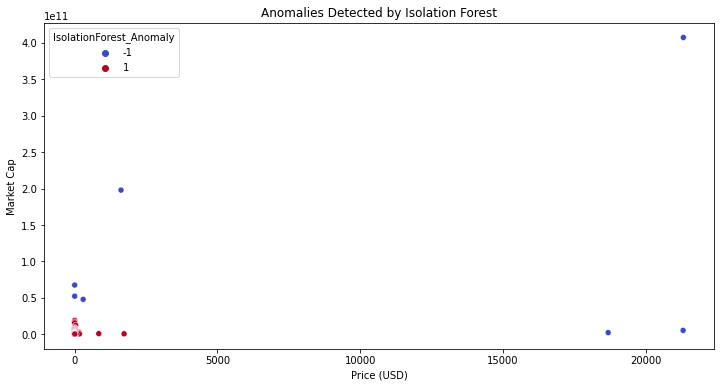

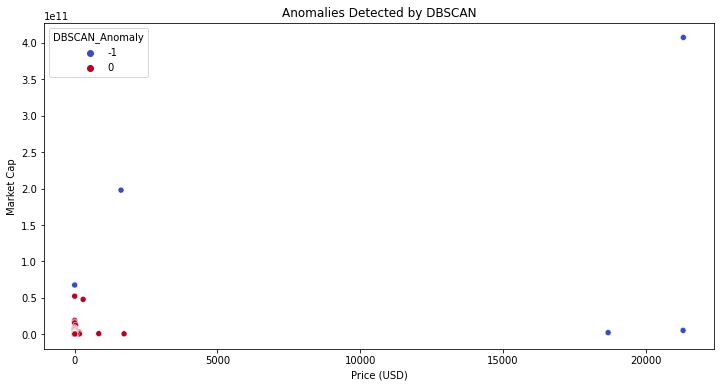

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/crypto_anomalies.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Display first few rows
display(df.head())

# EDA: Summary statistics
print(df.describe())

# Handling missing values
df.dropna(inplace=True)

# Selecting relevant numerical features
features = ['Price (USD)', 'Market Cap', 'Vol (24H)', 'Chg (24H)', 'Chg (7D)']
df_selected = df[features]

# Scaling features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# --- Exploratory Data Analysis ---
plt.figure(figsize=(12, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
df_selected.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()

# --- Anomaly Detection ---

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['IsolationForest_Anomaly'] = iso_forest.fit_predict(df_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['DBSCAN_Anomaly'] = dbscan.fit_predict(df_scaled)

# Scatter plot highlighting anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Price (USD)'], y=df['Market Cap'], hue=df['IsolationForest_Anomaly'], palette='coolwarm')
plt.title("Anomalies Detected by Isolation Forest")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Price (USD)'], y=df['Market Cap'], hue=df['DBSCAN_Anomaly'], palette='coolwarm')
plt.title("Anomalies Detected by DBSCAN")
plt.show()

# Save results
df.to_csv("/mnt/data/crypto_anomalies.csv", index=False)
print("Anomaly detection completed. Results saved as crypto_anomalies.csv")
